# 2 Linear regression with one variable

"In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities." <br>

"You would like to use this data to help you select which city to expand
to next.
The file ex1data1.txt contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.
The ex1.m script has already been set up to load this data for you."

## 2.1 Plotting the data

"Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can’t be plotted on a 2-d plot.)
In ex1.m, the dataset is loaded from the data file into the variables X
and y:"


In [7]:
#Cell to show how is the code in the 
#script plotData.py 

#Note that in the code 
#below a call is made to 
#the plotData function -> "from plotData import *"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotData(x, y):
    
    phi = (1 + np.sqrt(5))/2
    height = 10
    width = 8*phi

    plt.figure(figsize=(width, height))
    plt.plot(X, y, 'rx', markersize=10)
    plt.grid(True)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    
    return

Plotting Data ..


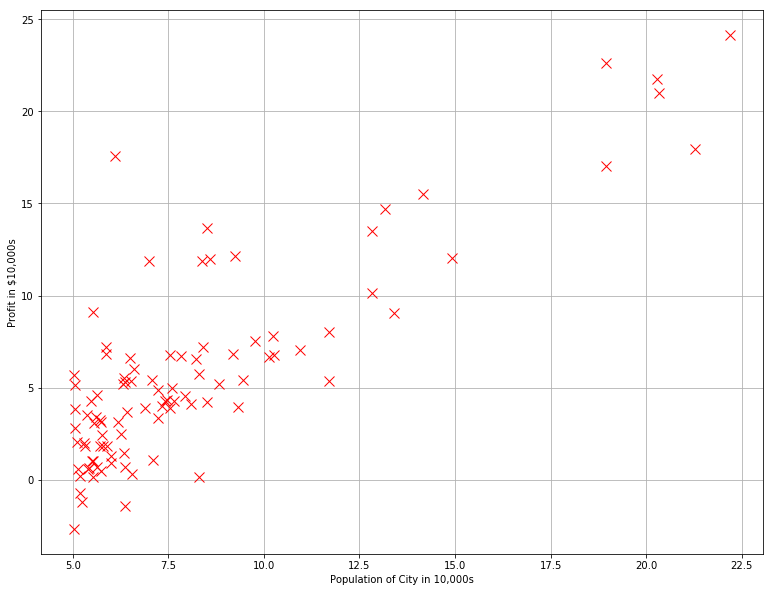

In [17]:
from python_lib.plotData import *
import pandas as pd
%matplotlib inline
#%matplotlib tk for a window

print("Plotting Data ..")
data = pd.read_csv('data/ex1data1.txt', header=None)
X = data.values[:,0]
y = data.values[:,1]
m = len(data)

plotData(X, y)


## 2.2 Gradient Descent

"In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent."

### 2.2.1 Update Equations

"The objective of linear regression is to minimize the cost function"

$$J\left(\theta\right)=\cfrac{1}{2m}\,\sum_{i=1}^{m}\left(h_{\theta}\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)^{2}$$


"where the hypothesis hθ (x) is given by the linear model"

$$
h_{\theta}\left(x\right)=\theta^{T}x=\theta_{0}+\theta_{1}x_{1}
$$

"Recall that the parameters of your model are the θj values. These are
the values you will adjust to minimize cost J(θ). One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update"


$$
\theta_{j}:=\theta_{j}-\alpha\cfrac{1}{m}\,\sum_{i=1}^{m}\left(h_{\theta}\left(x^{\left(i\right)}\right)-y^{\left(i\right)}\right)x_{j}^{i}
$$

"With each step of gradient descent, your parameters θj come closer to the
optimal values that will achieve the lowest cost J(θ)."

"Implementation Note: We store each example as a row in the the X
matrix in Octave/MATLAB. To take into account the intercept term (θ0 ),
we add an additional first column to X and set it to all ones. This allows
us to treat θ0 as simply another ‘feature’.
"

### 2.2.2 Implementation

"In ex1.m, we have already set up the data for linear regression. In the
following lines, we add another dimension to our data to accommodate the
θ0 intercept term. We also initialize the initial parameters to 0 and the
learning rate alpha to 0.01"

### 2.2.3 Computing the cost  $\, J(\theta)$

"As you perform gradient descent to learn minimize the cost function J(θ),
it is helpful to monitor the convergence by computing the cost. In this
section, you will implement a function to calculate J(θ) so you can check the
convergence of your gradient descent implementation.
Your next task is to complete the code in the file computeCost.m, which
is a function that computes J(θ). As you are doing this, remember that the
variables X and y are not scalar values, but matrices whose rows represent
the examples from the training set.
Once you have completed the function, the next step in ex1.m will run
computeCost once using θ initialized to zeros, and you will see the cost
printed to the screen.
You should expect to see a cost of 32.07.
"

In [13]:
import numpy as np

def computeCost(X, y, theta):
    
    m = y.shape[0]
    
    # to only do once the matrix multiplication 
    # the variable h_y was added    
    h_y = np.matmul(X, theta) - y
    
    # [0, 0] argument is to only give the value and not an
    # array of arrays
    return (1/(2*m))*np.matmul(h_y.transpose(), h_y)[0,0]

In [19]:
import numpy as np
import pandas as pd
from python_lib.computeCost import *

data = pd.read_csv('data/ex1data1.txt', header=None)
m = len(data)

X = data.values[:,0].reshape((m, 1))
y = data.values[:,1].reshape((m, 1))

# "add a column of ones to X"
X = np.hstack((np.ones((m, 1)), X))

# "initialize fitting parameters"
theta = np.array([[0], [0]])


print("Testing the cost function ...")


J = computeCost(X, y, theta)
print("With theta = [[0], [0]]\nCost computed = {}".\
      format(J))
print("Expected cost value (approx) 32.07")

J = computeCost(X, y, np.array([[-1], [2]]))
print("With theta = [[-1], [2]]\nCost computed = {}".\
      format(J))
print("Expected cost value (approx) 54.24")

Testing the cost function ...
With theta = [[0], [0]]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07
With theta = [[-1], [2]]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24
